# Exercícios do Livro de introdução ao Python em Ciências atmosféricas e Oceânicas:

Ref: http://www.johnny-lin.com/pyintro/ed01/free_pdfs/ch04.pdf

In [1]:
import numpy as np


In [4]:
for i in np.arange(20):
    print("OI. Eu sou: ", i)

OI. Eu sou:  0
OI. Eu sou:  1
OI. Eu sou:  2
OI. Eu sou:  3
OI. Eu sou:  4
OI. Eu sou:  5
OI. Eu sou:  6
OI. Eu sou:  7
OI. Eu sou:  8
OI. Eu sou:  9
OI. Eu sou:  10
OI. Eu sou:  11
OI. Eu sou:  12
OI. Eu sou:  13
OI. Eu sou:  14
OI. Eu sou:  15
OI. Eu sou:  16
OI. Eu sou:  17
OI. Eu sou:  18
OI. Eu sou:  19


In [23]:
A = np.arange(10)

A = np.reshape(A, (5,2))

print(A)

print("Ravel: ", A.ravel())

print("Flatten: ", A.flatten())

print("Repeat: ", np.repeat(A, 2).reshape((5,4)))

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
Ravel:  [0 1 2 3 4 5 6 7 8 9]
Flatten:  [0 1 2 3 4 5 6 7 8 9]
Repeat:  [[0 0 1 1]
 [2 2 3 3]
 [4 4 5 5]
 [6 6 7 7]
 [8 8 9 9]]


In [49]:
B = np.array([1,1,2,2,3,3,4,4,5,5]).reshape(5,2)

Mag = ((A**2) + (B**2))**0.5

print("Mag: \n" , Mag)

Distance = np.linalg.norm(A-B)

print("Distance: \n", Distance)
print("")

Mag: 
 [[ 1.          1.41421356]
 [ 2.82842712  3.60555128]
 [ 5.          5.83095189]
 [ 7.21110255  8.06225775]
 [ 9.43398113 10.29563014]]
Distance: 
 6.708203932499369



### Exercise 14 (Calculate potential temperature from arrays of T and p):

Write a function that takes a 2-D array of pressures (p, in hPa) and a
2-D array of temperatures (T, in K) and returns the corresponding potential
temperature, assuming a reference pressure (p0) of 1000 hPa. Thus, the function’s
return value is an array of the same shape and type as the input arrays.
Recall that potential temperature θ is given by:

θ = T * (p0/p)**κ

where κ is the ratio of the gas constant of dry air to the specific heat of dry
air at constant pressure and equals approximately 0.286.

In [24]:
# solução:

def Potential_temperature(T, po=1000, kappa=0.286):

    Theta = T*(po/p)**kappa
    
    return Theta
    
    

### Exercise 15 (Calculating wind speed from u and v):

Write a function that takes two 2-D arrays—an array of horizontal, zonal east-west) wind components (u, in m/s) and an array of horizontal, meridional (north-south) wind components (v, in m/s)—and returns a 2-D array of the magnitudes of the total wind, if the wind is over a minimum magnitude, and the minimum magnitude value otherwise. (We might presume that in
this particular domain only winds above some minimum constitute “good” data while those below the minimum are indistinguishable from the minimum due to noise or should be considered equal to the minimum in order to properly represent the effects of some quantity like friction.)
Thus, your input will be arrays u and v, as well as the minimum magnitude value. The function’s return value is an array of the same shape and type as the input arrays.


In [50]:
def Wind_Magnitudes(u, v, minmag=0.1):
    mag = ((u**2) + (v**2))**0.5
    
    output = np.where(mag > minmag, mag, minmag)
    
    return output

# Criando um netcdf:

In [67]:
from netCDF4 import *
import numpy as np

fileobj = Dataset('new_NETCDF.nc', mode='w')
lat = np.arange(10, dtype='f')
lon = np.arange(20, dtype='f')
data1 = np.reshape(np.sin(np.arange(200, dtype='f')*0.1), (10,20))

data2 = 42.0

# criando dimensoes do arquivo:
fileobj.createDimension("lat", len(lat))
fileobj.createDimension("lon", len(lon))

# criando variáveis:
    # primeiro "lat" é o nome da variável a ser criada.
    # segundo "lat" é o nome da dimensão em que a var será atribuida.
lat_var = fileobj.createVariable("lat", "f", ("lat",)) 
lon_var = fileobj.createVariable("lon", "f", ("lon",))
data1_var = fileobj.createVariable("data1", "f", ("lat","lon"))
data2_var = fileobj.createVariable("data2", "f", ()) # como data2 é um scalar, a dimensão na tupla é vazia

# atribuindo valores às variaveis do netcdf:

lat_var[:] = lat[:]
lon_var[:] = lon[:]
data1_var[:,:] = data1[:,:]
data1_var.units = "kg"
data2_var.assignValue(data2)
fileobj.title = "New netCDF file"
crs = fileobj.createVariable('spatial_ref', 'i4', ())
crs.spatial_ref='GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]]'
fileobj.close()


# A “Real” AOS Project: Putting Together a Basic Data Analysis Routine

## Defining your own class

In [225]:
class Book(object):
    def __init__(self, authorlast, authorfirst, title, place, publisher, year):
        self.authorlast = authorlast
        self.authorfirst = authorfirst
        self.title = title
        self.place = place
        self.publisher = publisher
        self.year = year

    def make_authoryear(self):
        self.authoryear = self.authorlast + '(' + self.year +')'

    def write_bib_entry(self):
        return self.authorlast + ', ' + self.authorfirst \
                               + ', ' + self.title + ', ' + self.place \
                               + ':  ' + self.publisher + ', ' \
                               + self.year + '.'

    def __doc__(self):
        """
        Classe de objetos criada pelo usuário como exemplo! \n
        
        Metodos da classe: __init__ ; __doc__ ; write_bib_entry  \n
        
        # atributos (dados) da classe: 
            self.authorlast, self.authorfirst, self.title, \n 
            self.place, self.publisher, self.year
        
        """
    
    
beauty = Book( "Dubay", "Thomas" , "The Evidential Power of Beauty" ,
              "San Francisco" , "Ignatius Press", "1999" )

beauty.write_bib_entry()

pynut = Book( "Martelli", "Alex" , "Python in a Nutshell" ,
             "Sebastopol, CA" , "O’Reilly Media, Inc.", "2003" )

### Example 49 (Using instances of Book):
Consider the Book definition given in Example 48. Here are some questions
to test your understanding of what it does:
1. How would you print out the author attribute of the pynut instance
(at the interpreter, after running the file)?

2. How would you change the publication year for the beauty book to
"2010"?


In [79]:

# 1)
print("author attribute: ", pynut.authorfirst)

# 2) 

beauty.year = 2010

author attribute:  Alex


In [224]:
# class article:

class Article(object):
    def __init__(self, authorlast, authorfirst, articletitle, journaltitle,
                 volume, pages, year):
        self.authorlast = authorlast
        self.authorfirst = authorfirst
        self.articletitle = articletitle
        self.journaltitle = journaltitle
        self.volume = volume
        self.pages = pages
        self.year = year

    def make_authoryear(self):
        self.authoryear = self.authorlast + ' (' + self.year +')'

    def write_bib_entry(self):
        return self.authorlast + ', ' + self.authorfirst \
                               + ' (' + self.year + '):  ' \
                               + '"' + self.articletitle + '," ' \
                               + self.journaltitle + ', ' \
                               + self.volume + ', ' + self.pages + '.'

# Case study 1: The bibliography example

write a Bibliography class that will manage a bibliography, given instances of Book and Article objects.

Next, we write methods for Bibliography that can manipulate the list
of Book and Article instances. To that end, the first two methods we
write for Bibliography will do the following: initialize an instance of the
class; rearrange the list alphabetically based upon last name then first name.
The initialization method is called init (as always), and the rearranging
method will be called sort entries alpha. Here is the code:

In [226]:
import operator

class Bibliography(object):
    def __init__(self, entrieslist):
        self.entrieslist = entrieslist # list of Book and Article instances that are being passed into an instance of the Bibliography class
    
    def sort_entries_alpha(self):
        tmp = sorted(self.entrieslist, key=operator.attrgetter("authorlast","authorfirst"))
        self.entrieslist = tmp
        del tmp
        
    def write_bibliog_alpha(self):
        self.sort_entries_alpha()
        output = ''
        for ientry in self.entrieslist:
            output = output + ientry.write_bib_entry() + '\n\n'
        return output[:-2] # as ultimas duas linhas de espaço são desprezadas.
    
# criando instancias:

beauty = Book( "Dubay", "Thomas", "The Evidential Power of Beauty",
               "San Francisco", "Ignatius Press", "1999", )
pynut = Book( "Martelli", "Alex", "Python in a Nutshell",
              "Sebastopol, CA", "O'Reilly Media, Inc.", "2003" )

nature = Article( "Smith", "Jane", "My Nobel prize-winning paper",
                  "Nature", "481", "234-236", "2012" )
science = Article( "Doe", "Samuel", "My almost Nobel prize-winning paper",
                  "Science", "500", "36-38", "2011" )
noname = Article( "Doe", "John", "My no-one-has-heard-of paper",
                  "J. Irreproducible Results", "49", "34-36", "2005" )



mybib = Bibliography([beauty, pynut, nature, science, noname])

for i in mybib.entrieslist:
    print ('Entries list before sort:  \n    ', i.authorlast)
    
mybib.sort_entries_alpha()
print("\n\n\n")
for i in mybib.entrieslist:
    print ('Entries list after sort:  \n    ', i.authorlast)

print("\n\n\n")   


print ('Write out bibliography:  \n', mybib.write_bibliog_alpha())

Entries list before sort:  
     Dubay
Entries list before sort:  
     Martelli
Entries list before sort:  
     Smith
Entries list before sort:  
     Doe
Entries list before sort:  
     Doe




Entries list after sort:  
     Doe
Entries list after sort:  
     Doe
Entries list after sort:  
     Dubay
Entries list after sort:  
     Martelli
Entries list after sort:  
     Smith




Write out bibliography:  
 Doe, John (2005):  "My no-one-has-heard-of paper," J. Irreproducible Results, 49, 34-36.

Doe, Samuel (2011):  "My almost Nobel prize-winning paper," Science, 500, 36-38.

Dubay, Thomas, The Evidential Power of Beauty, San Francisco:  Ignatius Press, 1999.

Martelli, Alex, Python in a Nutshell, Sebastopol, CA:  O'Reilly Media, Inc., 2003.

Smith, Jane (2012):  "My Nobel prize-winning paper," Nature, 481, 234-236.


# Case study 2: Creating a class for geosciences work—Surface domain management

## Exercise 24 (Defining a SurfaceDomain class):

Define a class SurfaceDomain that describes surface domain instances.
The domain is a land or ocean surface region whose spatial extent is described
by a latitude-longitude grid. The class is instantiated when you provide
a vector of longitudes and latitudes; the surface domain is a regular
grid based on these vectors. Surface parameters (e.g., elevation, temperature,
roughness, etc.) can then be given as instance attributes. The quantities
are given on the domain grid.

In addition, in the class definition, provide an instantiation method that
saves the input longitude and latitude vectors as appropriately named attributes
and creates 2-D arrays of the shape of the domain grid which have
the longitude and latitude values at each point and saves them as private attributes
(i.e., their names begin with a single underscore).

In [ ]:
import numpy as np

class SurfaceDomain():
    def __init__(self, lon, lat):
        self.lon = np.array(lon)
        self.lat = np.array(lat)
        
        self.Llon, self.Llat = np.meshgrid(self.lon, self.lat)
        
        

# como lidar com múltiplas bordas (limites espaciais):

pretend you have multiple SurfaceDomain instances that
you want to communicate to each other, where the bounds of one are taken
from (or interpolated with) the bounds of another, e.g., calculations for each
domain instance are farmed out to a separate processor, and you’re stitching
domains together:

## in procedural programming:

In procedural programming, to manage this set of overlapping domains, you might create a grand domain encompassing all points in all the domains to make an index that keeps track of which domains abut one another. The index records who contributes data to these boundary regions. Alternately, you might create a function that processes only the neighboring domains, but
this function will be called from a scope that has access to all the domains
(e.g., via a common block).


## in object oriented programming (OOP):

In order to manage this set of overlapping domains, you don’t really need
such a global view nor access to all domains. In fact, a global index or a
common block means that if you change your domain layout, you have to
hand-code a change to your index/common block. Rather, what you actually
need is only to be able to interact with your neighbor. So why not just write a
method that takes your neighboring SurfaceDomain instances as arguments and alters the boundaries accordingly? That is, why not add the following to the SurfaceDomain class definition:

### resposta:

Such a method will propagate to all SurfaceDomain instances automatically,
once written in the class definition. Thus, you only have to write one
(relatively) small piece of code that can then affect any number of layouts
of SurfaceDomain instances. Again, object-oriented programming enables
you to push the level at which you code to solve a problem down to a lowerlevel
than procedural programming easily allows. As a result, you can write
smaller, better tested bit of code; this makes your code more robust and flexible.

In [121]:
import numpy as np

class SurfaceDomain():
    def __init__ (self, lon, lat):
        self.lon = np.array(lon)
        self.lat = np.array(lat)
        
        self.Llon, self.Llat = np.meshgrid(self.lon, self.lat)

    def syncbounds(self, northobj, southobj, eastobj, westobj):
        XX_Bounds = np.where((self.Llon <= northobj) & (self.Llon >= southobj))
        YY_Bounds = np.where((self.Llat <= eastobjt) & (self.Llat >= westobj))
        
        return [XX_Bounds, YY_Bounds]
        

# Chapter 8: 

## An Introduction to OOP Using Python: Part II—Application to Atmospheric Sciences Problems

### Masked Arrays - Booleans:

#### Obs: Remember, bad values (i.e., the missing values) have mask values set to True in a masked array

In [167]:
print(np.arange(5))

ma = np.where(np.arange(5) >= 3)

print(ma)

b = np.ma.masked_greater(np.arange(5), 2)

print("b data: ", b.data)

print("b mask: ", b.mask)

ma_C = b.data * np.where(b.mask == False, np.nan, b.mask)

print(ma_C)

[0 1 2 3 4]
(array([3, 4], dtype=int64),)
b data:  [0 1 2 3 4]
b mask:  [False False False  True  True]
[nan nan nan  3.  4.]


In [2]:
# Caso 2:
import numpy as np
a = np.ma.masked_array(data=[1,2,3], mask=[True, True, False], fill_value=10**5)

print(a)



[-- -- 3]


In [171]:
# caso 3:

a = np.ma.masked_greater([1,2,3,4], 3)

print(a)
data = np.array([1,2,3,4,5])
b = np.ma.masked_where((data>2) & (data<5), data)

print(b.mask)

[1 2 3 --]
[False False  True  True False]


In [177]:
# Notar como np.ma.filled é o inverso de (b.data * b.mask):
a = np.ma.masked_greater([1,2,3,4], 3)
b = np.ma.masked_where((data>2) & (data<5), data)

# multiplicando pelo mask retorna todos os valores que foram mascarados

print(b.data * b.mask)

# usando np.ma.filled: retorna todos os valores que não foram mascarados

print(  np.ma.filled(b)  )

print(   b.filled())



[0 0 3 4 0]
[     1      2 999999 999999      5]
[     1      2 999999 999999      5]


## Exercise using masked Arrays:

Open the example netCDF NCEP/NCAR Reanalysis 1 netCDF dataset
of monthly mean surface/near-surface air temperature (or the netCDF dataset
you brought) and read in the values of the air, lat, and lon variables into
NumPy arrays. Take only the first time slice of the air temperature data. 

Create an array that masks out temperatures in that time slice in all locations
greater than 45◦N and less than 45◦S. 

Convert all those temperature
values to K (the dataset temperatures are in ◦C). Some hints:
 

In [26]:
# exercicios:
import numpy as np
from netCDF4 import *

Air_mon_mean_nc = Dataset(r'C:\Doutorado\Estudo_Python\jwblin-course_files-cd5df00\datasets\air.mon.mean.nc')

Lat = Air_mon_mean_nc.variables['lat']

Lon = Air_mon_mean_nc.variables['lon']

Time = Air_mon_mean_nc.variables['time']

Air_temp = Air_mon_mean_nc.variables['air']



In [27]:
# 1) mask arrays:

# bounds:

Lim_N = 45

Lim_S = -45


Lonall, Latall = np.meshgrid(Lon, Lat)

Air_temp_ma = np.ma.masked_where((Latall[:]<Lim_S) | (Latall[:]>Lim_N)  , Air_temp[0,:,:])

print(   Air_temp_ma.filled() )



print ('North pole: ', Air_temp_ma[0,10])
print ('South pole: ', Air_temp_ma[-1,10])
print ('Equator: ', Air_temp_ma[36,10])

[[1.e+20 1.e+20 1.e+20 ... 1.e+20 1.e+20 1.e+20]
 [1.e+20 1.e+20 1.e+20 ... 1.e+20 1.e+20 1.e+20]
 [1.e+20 1.e+20 1.e+20 ... 1.e+20 1.e+20 1.e+20]
 ...
 [1.e+20 1.e+20 1.e+20 ... 1.e+20 1.e+20 1.e+20]
 [1.e+20 1.e+20 1.e+20 ... 1.e+20 1.e+20 1.e+20]
 [1.e+20 1.e+20 1.e+20 ... 1.e+20 1.e+20 1.e+20]]
North pole:  --
South pole:  --
Equator:  22.829353


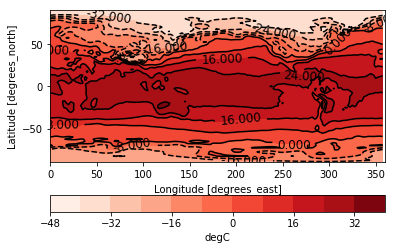

In [34]:
import matplotlib.pyplot as plt

T_time0 = Air_temp[0,:,:]

mymapf = plt.contourf(Lonall, Latall, T_time0, 10, cmap=plt.cm.Reds)
mymap = plt.contour(Lonall, Latall, T_time0, 10, colors="k")
plt.clabel(mymap, fontsize=12)
plt.axis([0, 360, -90, 90])
plt.xlabel("Longitude [" + Lon.units + "]")
plt.ylabel("Latitude [" + Lat.units + "]")
plt.colorbar(mymapf, orientation="horizontal", label = Air_temp.units)

plt.savefig("exercise-T-contour.png")
plt.show()


## secondary quantities (ex. virtual temperature, vorticity, etc.)

    1) são derivados das ´quantities (variables) primárias (e.g. temperature, pressure, etc.)
    
## Problemas de otimização de programação:

    1) Como otimizar memória para realização de análise dinâmica: >>> uso de classes (instance)

### We define an object class Atmosphere where the following occurs:

• Atmospheric quantities are assigned to attributes of instances of the
class.

• Methods to calculate atmospheric secondary quantities:
– Check to make sure the required quantity exists as an attribute.
– If it doesn’t exist, the method is executed to calculate that quantity.
– After the quantity is calculated, it is set as an attribute of the
object instance.

### funções de atributos para objetos:

1) hasattr: 
    - recebe 2 argumentos: (objeto da pesquisa, nome do atributo ou método de busca)
    
2) delattr:
    - recebe 2 argumentos: (objeto da pesquisa, nome do atributo a ser deletado)
    
3) setattr:
    - recebe 3 argumentos: (objeto da pesquisa, nome do atributo a ser criado, novo valor a ser atribuido)


In [ ]:
class Atmosphere(object):
    def __init__(self, **kwds):
        for ikey in kwds.keys():
            if hasattr(self, ikey) == False:
                setattr(self, ikey, kwds[ikey])
                
            else:
                return ikey.items()
            
    def Delattr(self, **kwds):
        for ikey in kwds.keys():
            delattr(self, ikey)
            
    def calc_rho(self):
        if not hasattr(self, 'T_v'):
            self.calc_virt_temp()
    
        elif not hasattr(self, 'p'):
            self.calc_press()

        else:
            raise ValueError, "cannot obtain given initial quantities"

        self.rho = [... find air density from self.T_v and
                      self.p ...]


In [10]:
class Pessoa():
    def __init__(self, nome, idade, peso):
        self.nome = nome
        self.peso = peso
        self.idade = idade
        self.x = 0
        self.y = 0
    def andar(self, x, y):
        self.x = self.x + x
        self.y +=y

        
Sheila_1 = Pessoa('Camila', peso=50, idade=32)



In [17]:
class Phi_numero():
    def __init__(self, x=0):
        self.x=x
    def __add__(self, *values):
        for v in values:
            self.x += v
        return self.x

In [20]:
P = Phi_numero(1)

P + 2 + 3

6

In [14]:
Sheila_1.andar(10, -2)

In [15]:
print(Sheila_1.x)
Sheila_1.y

10


-2